# 머신러닝

In [1]:
import pandas as pd
import numpy as npㅁ
from sklearn.neighbors import KNeighborsClassifier #분류

In [2]:
xor_input = [
    [0, 0, 0],
    [0, 1, 1], 
    [1, 0, 1],
    [1, 1, 0]
]

In [3]:
xor_df = pd.DataFrame(xor_input)
xor_df

,0,1,2
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
xor_data = xor_df.iloc[:,:2]
xor_label = xor_df.iloc[:,2]
print(xor_label)
xor_data

0    0
1    1
2    1
3    0
Name: 2, dtype: int64


,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [5]:
clf = KNeighborsClassifier(n_neighbors = 1)

In [6]:
clf.fit(xor_data, xor_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
clf.predict(xor_data) #데이터에 대한 결과값
clf.predict([[0, 1]])

array([1], dtype=int64)

In [8]:
clf.score(xor_data, xor_label) #얼마나 예측했는지

1.0

##### [실습] AND연산을 학습 해보자

In [9]:
and_input = [ #인풋
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
]

In [10]:
and_df = pd.DataFrame(and_input) #데이터 프레임 만들기
and_data = and_df.iloc[:,:2] #입력값 쪼개기
and_label = and_df.iloc[:,2] #결과값 쪼개기

In [11]:
and_clf = KNeighborsClassifier(n_neighbors = 1) #종류가 분류인 clf만들기
and_clf.fit(and_data, and_label) #값 입력

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
and_clf.predict(and_data) #and_data를 넣었을때 결과값

array([0, 0, 0, 1], dtype=int64)

In [13]:
and_clf.score(and_data, and_label) #정확도

1.0

4 2,
2 4

정확도 8 / 12 
재현율 2 / 4 = 0.5

### BMI_data

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  
#주피터 환경에서만 사용

In [16]:
tbl = pd.read_csv("bmi.csv", index_col = 'label') #label을 인뎃스로 하면 편함
tbl.head()

,height,weight
label,,
normal,140,45
fat,145,72
fat,150,61
fat,137,56
thin,192,48


In [17]:
set(tbl.index) #중복된 값은 제외

{'fat', 'normal', 'thin'}

In [18]:
def scatter(lbl, color) :
    w = tbl.loc[lbl,'weight']
    h = tbl.loc[lbl,'height']
    plt.scatter(w, h, c=color, label = lbl)
    plt.legend()

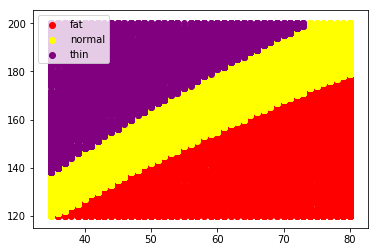

In [19]:
scatter('fat', 'r')
scatter('normal', 'yellow')
scatter('thin', 'purple')

In [25]:
tbl = pd.read_csv("bmi.csv")
tbl.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [24]:
tbl['label'].value_counts()

fat       7712
thin      6338
normal    5950
Name: label, dtype: int64

In [22]:
tbl.shape

(20000, 3)

In [23]:
tbl.info() #컬럼의 간략한 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
height    20000 non-null int64
weight    20000 non-null int64
label     20000 non-null object
dtypes: int64(2), object(1)
memory usage: 390.7+ KB


In [27]:
train = tbl.iloc[:14000,:]
test = tbl.iloc[14000:,:]

In [32]:
X_train = train.iloc[:,:2]
y_train = train.iloc[:,2]
X_test = test.iloc[:,:2]
y_test = test.iloc[:,2]

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model = KNeighborsClassifier()

In [35]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
model.predict(X_test)

array(['normal', 'thin', 'normal', ..., 'normal', 'normal', 'thin'],
      dtype=object)

In [37]:
model.score(X_test,y_test)

0.9946666666666667

In [40]:
model.predict([[162, 44]])

array(['thin'], dtype=object)